In [21]:
# Imports 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import datetime
from matplotlib.dates import DateFormatter

In [22]:
# Read csv file and clean column names
raw_data = pd.read_csv('testing_guesses.csv')
raw_data.columns = [x.lower() for x in raw_data.columns.values]

# Remove those without guesses and create new pd.DataFrame
data = raw_data[(raw_data.guess != '-') & (pd.notnull(raw_data.guess))].copy()

# Remove whitespace from names 
data.loc[data.index, 'player'] = data.player.apply(lambda x: x.strip())

# Convert the guesses to datetimes 
new_dates = pd.to_datetime(data.guess, format="%d/%m/%Y %H:%M:%S")
data.loc[:, "guess"] = new_dates.values

# Add ranking from earliest to latest and set as index 
data.loc[:, "guess_rank"] = data.rank().guess.astype(int)
data.set_index("guess_rank", inplace=True)
data.sort_index(inplace=True)

data.head()

,player,guess
guess_rank,,
1,Sean Ashfield,2020-05-14 17:00:00
2,Elin Bentall,2020-05-16 00:03:00
3,Joe Austin,2020-05-16 16:16:00
4,Chris Langman,2020-05-17 09:12:00
5,Miles Partridge,2020-05-17 11:11:00


In [23]:
def find_midpoint(guess_1, guess_2):
    return(guess_1 + (guess_2 - guess_1)/2)

In [24]:
first = data.loc[1, "guess"]
second = data.loc[2, "guess"]
print(first, second)

2020-05-14 17:00:00 2020-05-16 00:03:00


In [25]:
find_midpoint(first, second)

Timestamp('2020-05-15 08:31:30')

In [26]:
boundaries = pd.DataFrame()

for i in data.index:
    if i != 1 and i != data.index.max():
        idx_1 = data.loc[i - 1, "guess"]
        idx_2 = data.loc[i, "guess"] 
        idx_3 = data.loc[i + 1, "guess"]
        lower = find_midpoint(idx_1, idx_2)
        upper = find_midpoint(idx_2, idx_3)
        iteration = pd.DataFrame({'guess_rank': i, 'guess':idx_2, 'lower':lower, 'upper':upper}, index=[0])
    elif i == data.index.max():
        idx_1 = data.loc[i - 1, "guess"]
        idx_2 = data.loc[i, "guess"] 
        lower = find_midpoint(idx_1, idx_2)
        upper = datetime.datetime(2020,6,14)
        iteration = pd.DataFrame({'guess_rank': i, 'guess':idx_2, 'lower':lower, 'upper':upper}, index=[0])
    else:
        idx_2 = data.loc[i, "guess"] 
        idx_3 = data.loc[i + 1, "guess"]
        lower = datetime.datetime(2020,5,1)
        upper = find_midpoint(idx_2, idx_3)
        iteration = pd.DataFrame({'guess_rank': i, 'guess':idx_2, 'lower':lower, 'upper':upper}, index=[0])
        
    boundaries = pd.concat([boundaries,iteration], ignore_index=True)
    
boundaries.set_index('guess_rank', inplace=True)
boundaries

,guess,lower,upper
guess_rank,,,
1,2020-05-14 17:00:00,2020-05-01 00:00:00,2020-05-15 08:31:30
2,2020-05-16 00:03:00,2020-05-15 08:31:30,2020-05-16 08:09:30
3,2020-05-16 16:16:00,2020-05-16 08:09:30,2020-05-17 00:44:00
4,2020-05-17 09:12:00,2020-05-17 00:44:00,2020-05-17 10:11:30
5,2020-05-17 11:11:00,2020-05-17 10:11:30,2020-05-17 18:05:30
6,2020-05-18 01:00:00,2020-05-17 18:05:30,2020-05-18 03:06:00
7,2020-05-18 05:12:00,2020-05-18 03:06:00,2020-05-18 13:47:30
8,2020-05-18 22:23:00,2020-05-18 13:47:30,2020-05-18 22:58:30
9,2020-05-18 23:34:00,2020-05-18 22:58:30,2020-05-19 07:14:30


In [27]:
joined = data.join(boundaries.loc[:, ['lower','upper']], rsuffix='_r').sort_index()
joined.loc[:, ['player','guess','lower','upper']]

,player,guess,lower,upper
guess_rank,,,,
1,Sean Ashfield,2020-05-14 17:00:00,2020-05-01 00:00:00,2020-05-15 08:31:30
2,Elin Bentall,2020-05-16 00:03:00,2020-05-15 08:31:30,2020-05-16 08:09:30
3,Joe Austin,2020-05-16 16:16:00,2020-05-16 08:09:30,2020-05-17 00:44:00
4,Chris Langman,2020-05-17 09:12:00,2020-05-17 00:44:00,2020-05-17 10:11:30
5,Miles Partridge,2020-05-17 11:11:00,2020-05-17 10:11:30,2020-05-17 18:05:30
6,Tahirih McLaren-Brown,2020-05-18 01:00:00,2020-05-17 18:05:30,2020-05-18 03:06:00
7,Andy Brittain,2020-05-18 05:12:00,2020-05-18 03:06:00,2020-05-18 13:47:30
8,Val Partridge,2020-05-18 22:23:00,2020-05-18 13:47:30,2020-05-18 22:58:30
9,Matt Bentall,2020-05-18 23:34:00,2020-05-18 22:58:30,2020-05-19 07:14:30


In [28]:
joined["total_range"] = joined.upper - joined.lower
joined.sort_values('total_range')

,player,guess,lower,upper,total_range
guess_rank,,,,,
21,Cooke,2020-05-28 03:00:00,2020-05-28 02:04:30,2020-05-28 04:30:00,0 days 02:25:30
22,Keith Alexander,2020-05-28 06:00:00,2020-05-28 04:30:00,2020-05-28 10:30:00,0 days 06:00:00
14,Jerry Bentall,2020-05-22 02:04:00,2020-05-21 20:47:00,2020-05-22 03:20:00,0 days 06:33:00
5,Miles Partridge,2020-05-17 11:11:00,2020-05-17 10:11:30,2020-05-17 18:05:30,0 days 07:54:00
9,Matt Bentall,2020-05-18 23:34:00,2020-05-18 22:58:30,2020-05-19 07:14:30,0 days 08:16:00
13,Chris Partridge,2020-05-21 15:30:00,2020-05-21 12:21:00,2020-05-21 20:47:00,0 days 08:26:00
10,Jess Fermor,2020-05-19 14:55:00,2020-05-19 07:14:30,2020-05-19 15:42:30,0 days 08:28:00
6,Tahirih McLaren-Brown,2020-05-18 01:00:00,2020-05-17 18:05:30,2020-05-18 03:06:00,0 days 09:00:30
8,Val Partridge,2020-05-18 22:23:00,2020-05-18 13:47:30,2020-05-18 22:58:30,0 days 09:11:00


In [31]:
np.repeat(0.95, joined.index.max())

array([0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95,
       0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95,
       0.95, 0.95, 0.95, 0.95, 0.95])

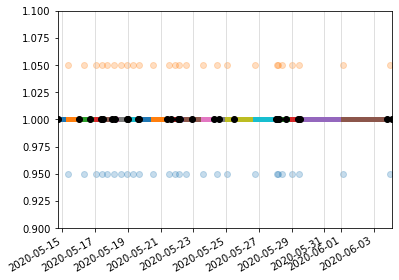

In [41]:
#plt.scatter(joined.guess, [1,1,1,1,1])
plt.scatter(joined.lower, np.repeat(0.95,joined.shape[0]), alpha=0.25)
plt.scatter(joined.upper, np.repeat(1.05,joined.shape[0]), alpha=0.25)
plt.xlim([joined.guess.min(), joined.guess.max()])
plt.ylim([0.9,1.1])

for i in joined.index:
    lower = joined.loc[i, :].lower
    upper = joined.loc[i, :].upper
    plt.plot([lower, upper], [1,1], linewidth = 5)
    
plt.scatter(joined.guess, np.repeat(1,joined.shape[0]), color='black', zorder=100)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='x', alpha=0.5, which='major')
#plt.plot([joined.guess.min(), joined.guess.max()], [0.95, 1.05], color='r', linewidth = 5)
plt.show()

In [35]:
pd.date_range('2020-05-13', '2020-06-06', freq="2D")

DatetimeIndex(['2020-05-13', '2020-05-15', '2020-05-17', '2020-05-19',
               '2020-05-21', '2020-05-23', '2020-05-25', '2020-05-27',
               '2020-05-29', '2020-05-31', '2020-06-02', '2020-06-04',
               '2020-06-06'],
              dtype='datetime64[ns]', freq='2D')

In [36]:
# Flooring date times can give you more control
pd.date_range('2020-05-13', '2020-06-06', 12).floor('6H')

DatetimeIndex(['2020-05-13 00:00:00', '2020-05-15 00:00:00',
               '2020-05-17 06:00:00', '2020-05-19 12:00:00',
               '2020-05-21 12:00:00', '2020-05-23 18:00:00',
               '2020-05-26 00:00:00', '2020-05-28 06:00:00',
               '2020-05-30 06:00:00', '2020-06-01 12:00:00',
               '2020-06-03 18:00:00', '2020-06-06 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [37]:
minor_ticks = pd.date_range('2020-05-13', '2020-06-06')

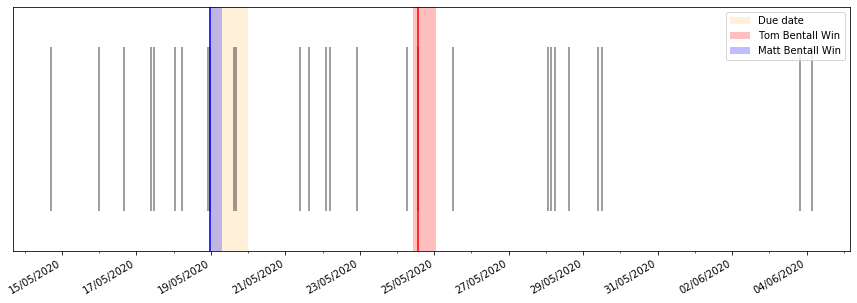

In [60]:
fig, ax = plt.subplots(figsize=(15,5))
ax.vlines(joined.guess, ymin=1, ymax=2, alpha=0.5)
ax.vlines(joined[joined.player == 'Tom Bentall'].iloc[0, 1], 
          ymin=0, 
          ymax=4,
          color='red')
ax.vlines(joined[joined.player == 'Matt Bentall'].iloc[0, 1], 
          ymin=0, 
          ymax=4, 
          color='blue')
ax.set_yticks([])
ax.set_xticks(pd.date_range('2020-05-13', '2020-06-06', freq="2D"))
ax.set_xticks(pd.date_range('2020-05-13', '2020-06-06'), minor=True)
ax.set_ylim([0.75, 2.25])

# Add background colour to indicate the full range of winning 
ax.axvspan(datetime.datetime(2020, 5, 19, 0, 0, 0), 
            datetime.datetime(2020, 5, 20, 0, 0, 0), 
            facecolor='orange', 
            alpha=0.15, 
            label = 'Due date')
ax.axvspan(joined[joined.player == 'Tom Bentall'].lower.max(), 
            joined[joined.player == 'Tom Bentall'].upper.max(), 
            facecolor='red', 
            alpha=0.25, 
            label = 'Tom Bentall Win')
ax.axvspan(joined[joined.player == 'Matt Bentall'].lower.max(), 
            joined[joined.player == 'Matt Bentall'].upper.max(),
            facecolor='blue', 
            alpha=0.25, 
            label = 'Matt Bentall Win')

myFmt = DateFormatter("%d/%m/%Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

ax.legend(loc='upper right')
plt.show()

In [61]:
colours = ['#706fd3',
           '#ffb142',
           '#227093', 
           '#ff793f',
           '#84817a',
           '#ff5252']
colours_simple = ['#2980b9', '#f1c40f']
visualisation_colours = np.resize(colours_simple, joined.index.max())
visualisation_colours

array(['#2980b9', '#f1c40f', '#2980b9', '#f1c40f', '#2980b9', '#f1c40f',
       '#2980b9', '#f1c40f', '#2980b9', '#f1c40f', '#2980b9', '#f1c40f',
       '#2980b9', '#f1c40f', '#2980b9', '#f1c40f', '#2980b9', '#f1c40f',
       '#2980b9', '#f1c40f', '#2980b9', '#f1c40f', '#2980b9', '#f1c40f',
       '#2980b9', '#f1c40f', '#2980b9'], dtype='<U7')

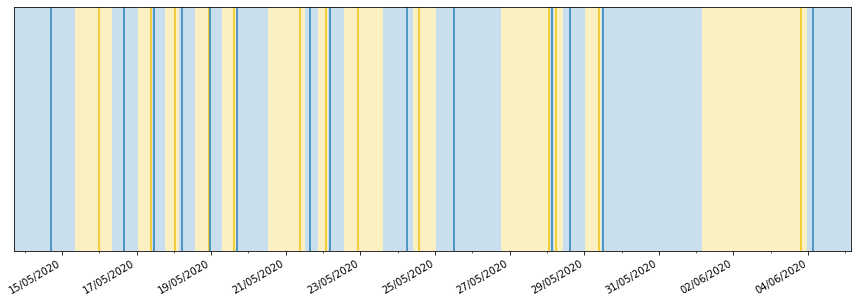

In [63]:
fig, ax = plt.subplots(figsize=(15,5))
#ax.vlines(joined.guess, ymin=1, ymax=2, alpha=0.5)
ax.set_yticks([])
ax.set_xticks(pd.date_range('2020-05-13', '2020-06-06', freq="2D"))
ax.set_xticks(pd.date_range('2020-05-13', '2020-06-06'), minor=True)
ax.set_ylim([0.75, 2.25])
ax.set_xlim([joined.guess.min() + pd.Timedelta(days=-1), 
             joined.guess.max() + pd.Timedelta(days=1)])

for i in joined.index:
    ax.vlines(joined.loc[i, 'guess'], 
          ymin=0, 
          ymax=4,
          color=visualisation_colours[i-1])
    ax.axvspan(joined.loc[i, 'lower'],
            joined.loc[i, 'upper'],
            facecolor=visualisation_colours[i-1], 
            alpha=0.25)
    
myFmt = DateFormatter("%d/%m/%Y")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

<BarContainer object of 13 artists>

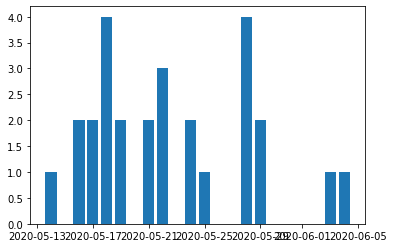

In [39]:
fig, ax = plt.subplots()
counts = joined.guess.groupby(joined.guess.dt.date).count()
ax.bar(x = counts.index, 
       height = counts.values)

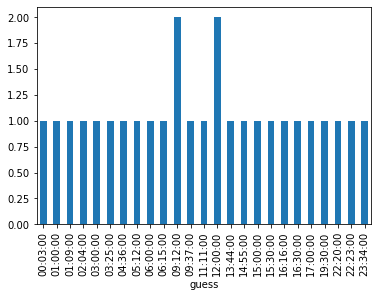

In [40]:
joined.guess.groupby(joined.guess.dt.time).count().plot(kind='bar')